# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

#### Reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-30-2021.csv"
covid = pd.read_csv(url)
covid

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-07-31 04:21:35,33.939110,67.709953,146523,6677,82586.0,57260.0,Afghanistan,376.391586,4.556964
1,NaN,NaN,NaN,Albania,2021-07-31 04:21:35,41.153300,20.168300,133036,2457,130205.0,374.0,Albania,4622.836889,1.846869
2,NaN,NaN,NaN,Algeria,2021-07-31 04:21:35,28.033900,1.659600,170189,4219,114531.0,51439.0,Algeria,388.107074,2.479009
3,NaN,NaN,NaN,Andorra,2021-07-31 04:21:35,42.506300,1.521800,14678,128,14210.0,340.0,Andorra,18996.958519,0.872053
4,NaN,NaN,NaN,Angola,2021-07-31 04:21:35,-11.202700,17.873900,42646,1008,36708.0,4930.0,Angola,129.756138,2.363645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,Tonga,2021-07-31 04:21:35,-21.179000,-175.198200,0,0,0.0,0.0,Tonga,0.000000,NaN
4004,NaN,NaN,NaN,Winter Olympics 2022,2021-07-31 04:21:35,39.904200,116.407400,0,0,0.0,0.0,Winter Olympics 2022,0.000000,0.000000
4005,NaN,NaN,NaN,Antarctica,2021-07-31 04:21:35,-71.949900,23.347000,0,0,0.0,0.0,Antarctica,0.000000,0.000000
4006,NaN,NaN,Jersey,United Kingdom,2021-07-31 04:21:35,49.213800,-2.135800,8179,69,0.0,0.0,"Jersey, United Kingdom",0.000000,0.000000


#### Display the top 5 rows in the data

In [2]:
covid.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-07-31 04:21:35,33.93911,67.709953,146523,6677,82586.0,57260.0,Afghanistan,376.391586,4.556964
1,NaN,NaN,NaN,Albania,2021-07-31 04:21:35,41.15330,20.168300,133036,2457,130205.0,374.0,Albania,4622.836889,1.846869
2,NaN,NaN,NaN,Algeria,2021-07-31 04:21:35,28.03390,1.659600,170189,4219,114531.0,51439.0,Algeria,388.107074,2.479009
3,NaN,NaN,NaN,Andorra,2021-07-31 04:21:35,42.50630,1.521800,14678,128,14210.0,340.0,Andorra,18996.958519,0.872053
4,NaN,NaN,NaN,Angola,2021-07-31 04:21:35,-11.20270,17.873900,42646,1008,36708.0,4930.0,Angola,129.756138,2.363645


#### Fwtching dataset info

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3832 non-null   object 
 3   Country_Region       4008 non-null   object 
 4   Last_Update          4008 non-null   object 
 5   Lat                  3919 non-null   float64
 6   Long_                3919 non-null   float64
 7   Confirmed            4008 non-null   int64  
 8   Deaths               4008 non-null   int64  
 9   Recovered            731 non-null    float64
 10  Active               731 non-null    float64
 11  Combined_Key         4008 non-null   object 
 12  Incident_Rate        3918 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.5+ KB


#### Sum of missing values of features in the dataset

In [4]:
covid.isnull().sum()

FIPS                    742
Admin2                  737
Province_State          176
Country_Region            0
Last_Update               0
Lat                      89
Long_                    89
Confirmed                 0
Deaths                    0
Recovered              3277
Active                 3277
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      45
dtype: int64

#### Number of Confirmed cases by Country

In [5]:
confirmed_cases_by_country = covid.groupby('Country_Region')['Confirmed'].sum().reset_index()
confirmed_cases_by_country

,Country_Region,Confirmed
0,Afghanistan,146523
1,Albania,133036
2,Algeria,170189
3,Andorra,14678
4,Angola,42646
...,...,...
193,West Bank and Gaza,316603
194,Winter Olympics 2022,0
195,Yemen,7058
196,Zambia,195096


#### Number of Deaths by Country

In [6]:
deaths_by_country = covid.groupby('Country_Region')['Deaths'].sum().reset_index()
deaths_by_country

,Country_Region,Deaths
0,Afghanistan,6677
1,Albania,2457
2,Algeria,4219
3,Andorra,128
4,Angola,1008
...,...,...
193,West Bank and Gaza,3601
194,Winter Olympics 2022,0
195,Yemen,1375
196,Zambia,3376


#### Number of Recovered cases by Country

In [7]:
recovered_by_country = covid.groupby('Country_Region')['Recovered'].sum().reset_index()
recovered_by_country

,Country_Region,Recovered
0,Afghanistan,82586.0
1,Albania,130205.0
2,Algeria,114531.0
3,Andorra,14210.0
4,Angola,36708.0
...,...,...
193,West Bank and Gaza,311772.0
194,Winter Olympics 2022,0.0
195,Yemen,4171.0
196,Zambia,186211.0


#### Number of Active Cases by Country

In [8]:
active_cases_by_country = covid.groupby('Country_Region')['Active'].sum().reset_index()
active_cases_by_country

,Country_Region,Active
0,Afghanistan,57260.0
1,Albania,374.0
2,Algeria,51439.0
3,Andorra,340.0
4,Angola,4930.0
...,...,...
193,West Bank and Gaza,1230.0
194,Winter Olympics 2022,0.0
195,Yemen,1512.0
196,Zambia,5509.0


#### Latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [9]:
cases_by_country = covid.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases_by_country

/tmp/ipykernel_34099/2245423186.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cases_by_country = covid.groupby('Country_Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,146523,6677,82586.0,57260.0
1,Albania,133036,2457,130205.0,374.0
2,Algeria,170189,4219,114531.0,51439.0
3,Andorra,14678,128,14210.0,340.0
4,Angola,42646,1008,36708.0,4930.0
...,...,...,...,...,...
193,West Bank and Gaza,316603,3601,311772.0,1230.0
194,Winter Olympics 2022,0,0,0.0,0.0
195,Yemen,7058,1375,4171.0,1512.0
196,Zambia,195096,3376,186211.0,5509.0


### Countries with no recovered cases

In [10]:
df = covid.groupby('Country_Region')['Recovered'].sum().reset_index()
countries_no_recovered_cases = df[df['Recovered']==0][['Country_Region', 'Recovered']]
countries_no_recovered_cases


,Country_Region,Recovered
5,Antarctica,0.0
17,Belgium,0.0
92,Kiribati,0.0
135,Palau,0.0
155,Serbia,0.0
168,Summer Olympics 2020,0.0
170,Sweden,0.0
179,Tonga,0.0
183,US,0.0
194,Winter Olympics 2022,0.0


#### Countries with no confirmed cases

In [11]:
df = covid.groupby('Country_Region')['Confirmed'].sum().reset_index()
countries_no_confirmed_cases = df[df['Confirmed']==0][['Country_Region', 'Confirmed']]
countries_no_confirmed_cases

,Country_Region,Confirmed
5,Antarctica,0
135,Palau,0
179,Tonga,0
194,Winter Olympics 2022,0


#### Countries with no deaths

In [12]:
df = covid.groupby('Country_Region')['Deaths'].sum().reset_index()
countries_no_deaths = df[df['Deaths']==0][['Country_Region', 'Deaths']]
countries_no_deaths

,Country_Region,Deaths
5,Antarctica,0
51,Dominica,0
76,Holy See,0
92,Kiribati,0
113,Marshall Islands,0
117,Micronesia,0
135,Palau,0
150,Samoa,0
161,Solomon Islands,0
168,Summer Olympics 2020,0


#### Top 10 countries with Confirmed cases

In [13]:
confirmed_cases_by_country.sort_values(by='Confirmed', ascending=False).head(10)

,Country_Region,Confirmed
183,US,35057505
80,India,31613993
24,Brazil,19887058
63,France,6166759
145,Russia,6161985
187,United Kingdom,5857556
182,Turkey,5704713
7,Argentina,4919408
38,Colombia,4776291
165,Spain,4447044


#### Top 10 Countries with Active cases

In [14]:
active_cases_by_country.sort_values(by='Active', ascending=False).head(10)

,Country_Region,Active
187,United Kingdom,5706843.0
63,France,5641937.0
165,Spain,4215182.0
116,Mexico,2588987.0
139,Peru,1912381.0
126,Netherlands,1845921.0
24,Brazil,1553585.0
17,Belgium,1102789.0
170,Sweden,1085385.0
155,Serbia,714508.0


#### Plotting Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [16]:
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-30-2021.csv"
covid = pd.read_csv(url)

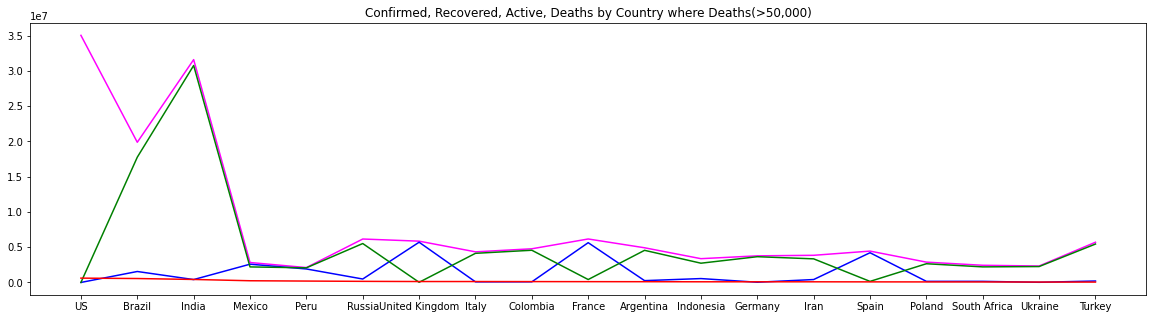

In [17]:
covid_data_by_country = covid.groupby(['Country_Region'])[['Deaths', 'Confirmed', 'Recovered', 'Active']].sum().reset_index()
plot_data = covid_data_by_country[covid_data_by_country['Deaths']>50000].sort_values(by='Deaths', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(plot_data['Country_Region'], plot_data['Confirmed'],color='magenta', label='Confirmed')
plt.plot(plot_data['Country_Region'], plot_data['Active'], color='blue', label='Active')
plt.plot(plot_data['Country_Region'], plot_data['Recovered'], color='green', label= 'Recovered')
plt.plot(plot_data['Country_Region'], plot_data['Deaths'],color='red', label='Deaths')
plt.title("Confirmed, Recovered, Active, Deaths by Country where Deaths(>50,000)")

plt.show()

### Plotting Province/State wise Deaths in USA

In [18]:
import plotly.express as px


url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv'
covid = pd.read_csv(url)

In [19]:
covid.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [20]:
covid_us = covid[covid['Country_Region']=='US']
covid_us_deaths = covid_us.groupby('Province_State')['Deaths'].sum().reset_index()
#covid_us_deaths = covid_us[covid_us['Deaths'] > 0]

covid_us_deaths_graph = px.bar(covid_us_deaths, x='Province_State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
covid_us_deaths_graph.show()


### Plotting Province/State Wise Active Cases in USA

In [21]:
covid_us = covid[covid['Country_Region']=='US']
covid_us_active = covid_us.groupby('Province_State')['Active'].sum().reset_index()

covid_us_active_graph = px.bar(covid_us_active, x='Province_State', y='Active', title='State wise reported active cases of COVID-19 in USA', text='Active')
covid_us_active_graph.show()



### Plotting Province/State Wise Confirmed cases in USA

In [22]:
covid_us = covid[covid['Country_Region']=='US']
covid_us = covid_us.groupby('Province_State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
covid_us = pd.melt(covid_us, id_vars='Province_State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
covid_us_graph = px.bar(covid_us, x='Province_State', y='Count', text='Count', barmode='group', color='Case', title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
covid_us_graph.show()

/tmp/ipykernel_34099/3328084178.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Plotting Worldwide Confirmed Cases over time

In [23]:
import plotly.express as px

In [24]:
total_cases = covid.groupby('Last_Update')['Last_Update', 'Confirmed'].sum().reset_index()
covid_cases_over_time_us_graph = px.line(total_cases, x="Last_Update", y="Confirmed", title="Worldwide Confirmed Novel Coronavirus (COVID-19) Cases Over Time")
covid_cases_over_time_us_graph.show()

/tmp/ipykernel_34099/2062912735.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

